In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/MithunKarthikRR/buisness_analytics_project/main/new_train.csv")

In [4]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [5]:
train.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [6]:
train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
train["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

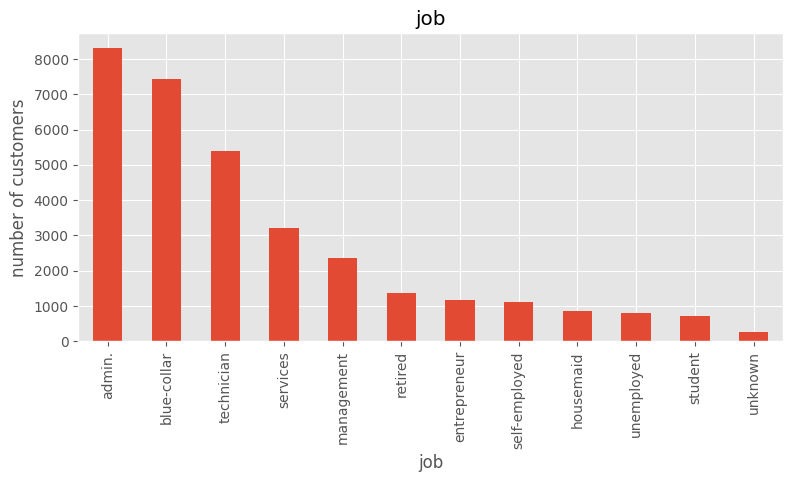

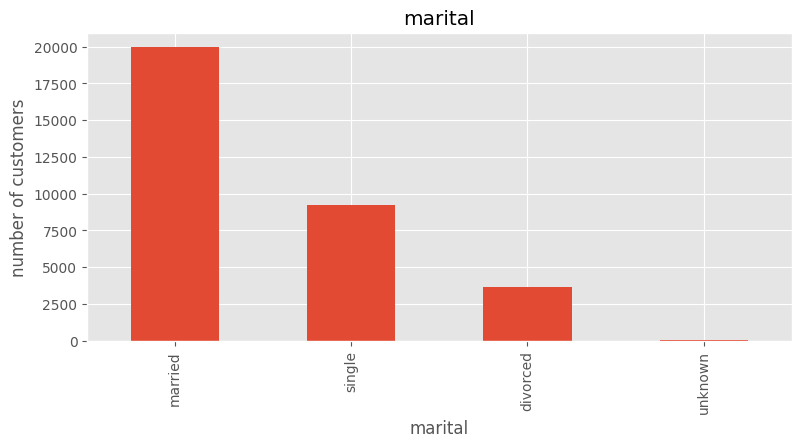

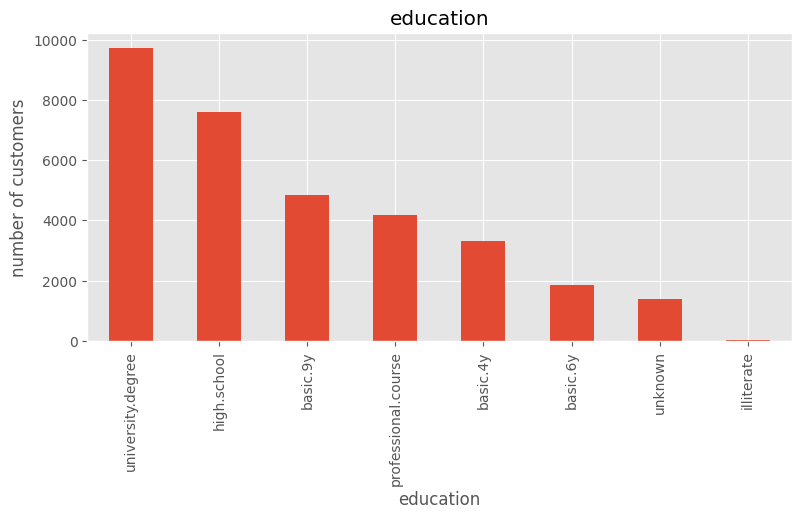

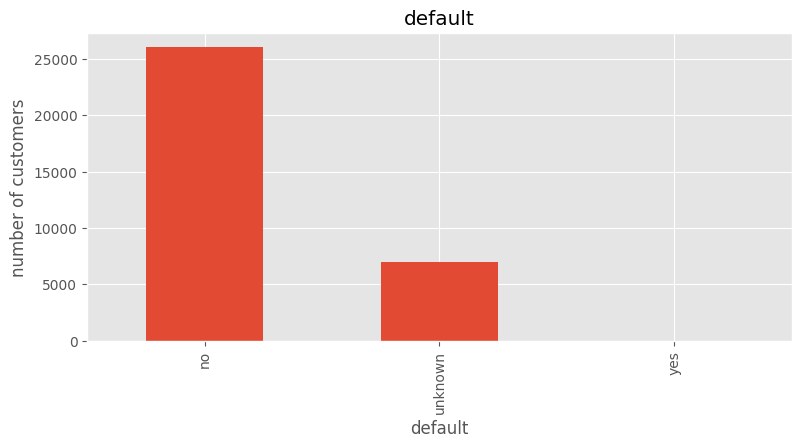

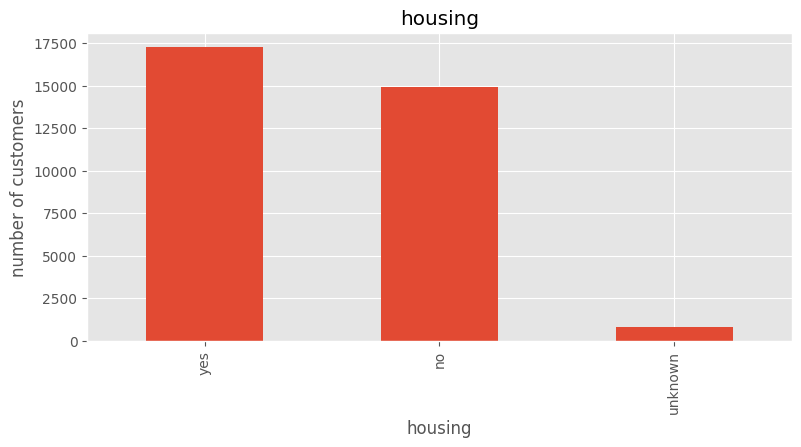

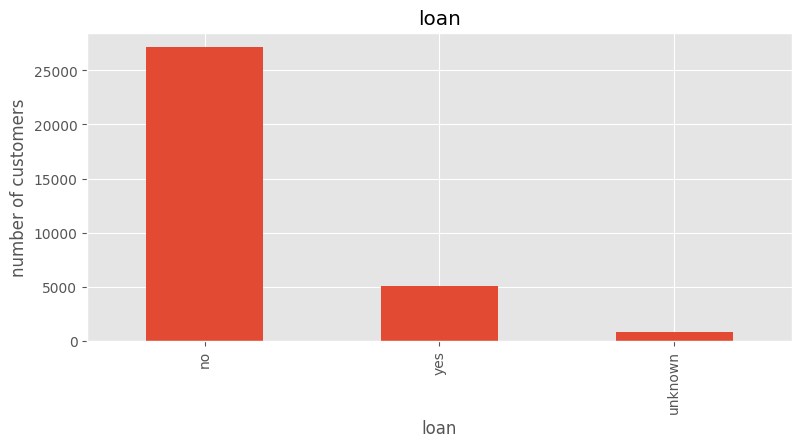

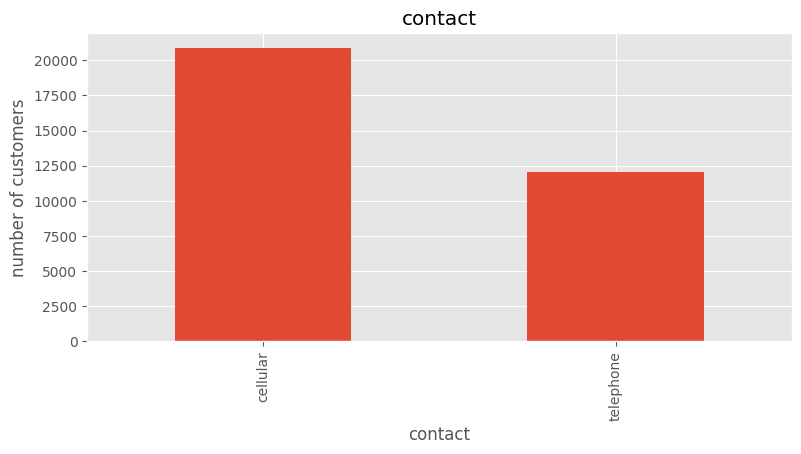

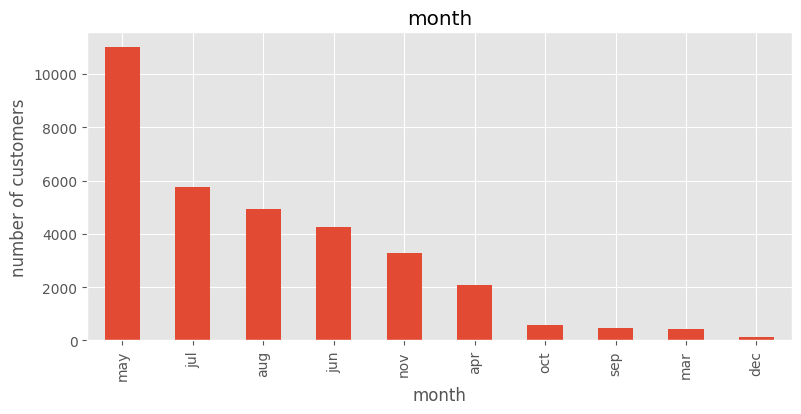

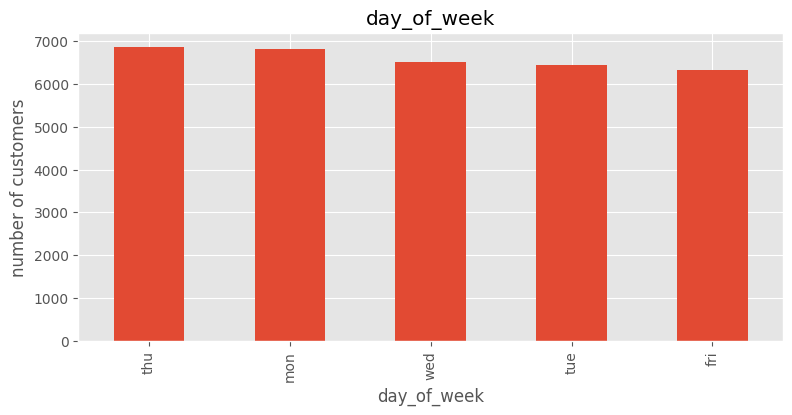

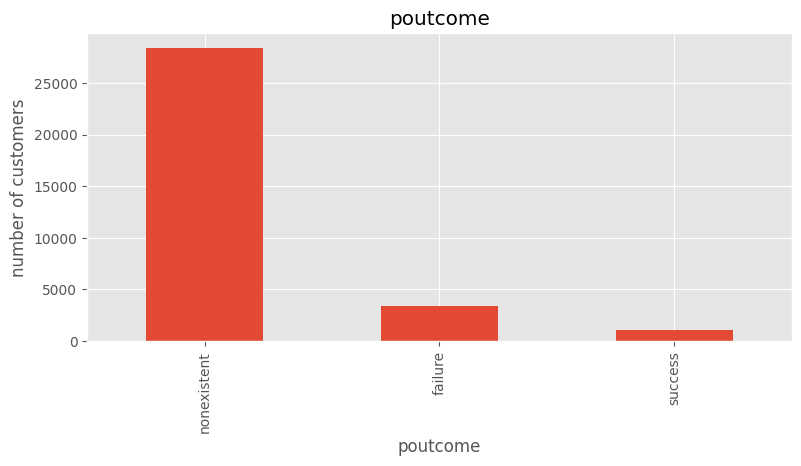

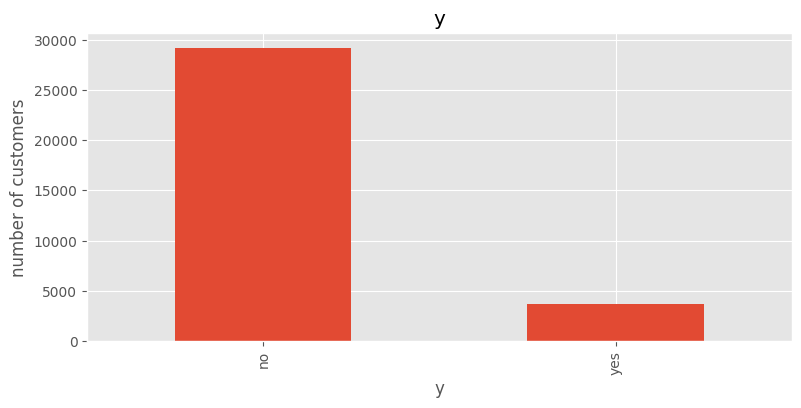

In [8]:
categ= train.select_dtypes(include= ["object"]).columns
plt.style.use("ggplot")
for column in categ:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    train[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

In [9]:
for column in categ:
    mode= train[column].mode()[0]
    train[column]= train[column].replace("unknown", mode)

In [10]:
train.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [11]:
categ

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [12]:
le= LabelEncoder()
for feature in categ:
    train[feature]= le.fit_transform(train[feature])

In [13]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,999,0,1,0
32946,52,9,1,5,0,1,0,0,7,0,64,1,999,1,0,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,999,0,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1,0


<Axes: >

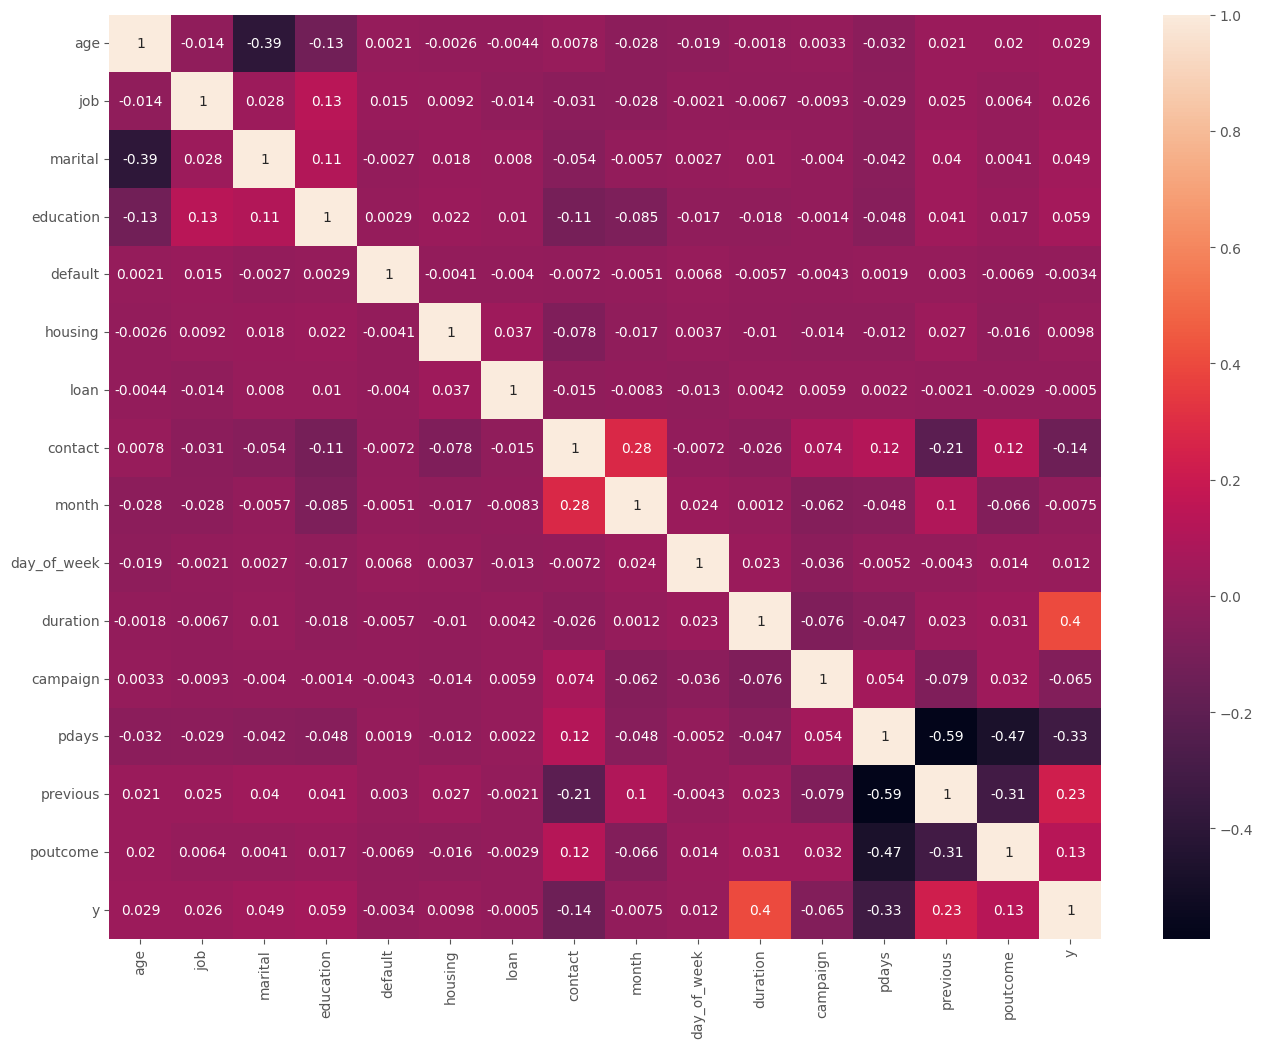

In [14]:
plt.figure(figsize = (16,12))
sns.heatmap(train.corr(), annot=True)

In [15]:
x= train.iloc[:, :-1]
y= train.iloc[:, -1]

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic reg

In [17]:
logr = LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred_log = logr.predict(x_test)

In [19]:
cm = confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[5647  151]
 [ 521  271]]


<Axes: >

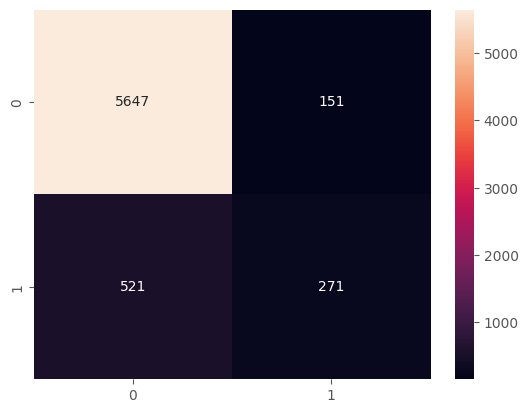

In [20]:
sns.heatmap(cm,annot=True, fmt='g')

In [21]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5798
           1       0.64      0.34      0.45       792

    accuracy                           0.90      6590
   macro avg       0.78      0.66      0.70      6590
weighted avg       0.88      0.90      0.88      6590



In [22]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_log))

Accuracy :  0.8980273141122913


Text(0, 0.5, 'True Positive Rate')

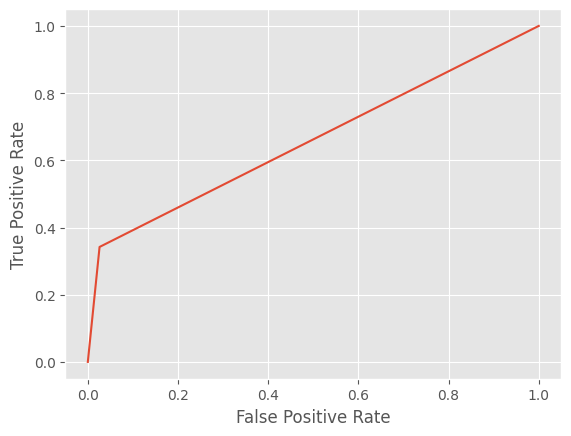

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [24]:
roc_log = roc_auc_score(y_test, y_pred_log)

In [25]:
print (f'AUC score: {roc_auc_score(y_test, y_pred_log)}')

AUC score: 0.6580641269542615


# Decision tree

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred_dt = dtc.predict(x_test)

In [28]:
cm = confusion_matrix(y_test, y_pred_dt)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[5347  451]
 [ 397  395]]


<Axes: >

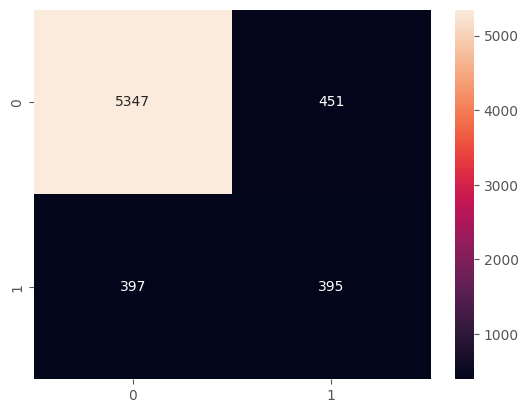

In [29]:
sns.heatmap(cm,annot=True, fmt='g')

In [30]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5798
           1       0.47      0.50      0.48       792

    accuracy                           0.87      6590
   macro avg       0.70      0.71      0.70      6590
weighted avg       0.88      0.87      0.87      6590



In [31]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8713201820940819


Text(0, 0.5, 'True Positive Rate')

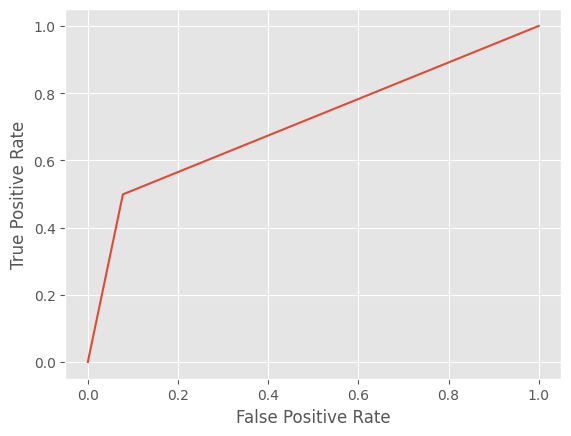

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [33]:
roc_dt = roc_auc_score(y_test, y_pred_dt)

In [34]:
print (f'AUC score: {roc_auc_score(y_test, y_pred_dt)}')

AUC score: 0.7104759652405394


# Naive Bayes

In [35]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [36]:
y_pred_nb = gnb.predict(x_test)

In [37]:
cm = confusion_matrix(y_test, y_pred_nb)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[5366  432]
 [ 411  381]]


<Axes: >

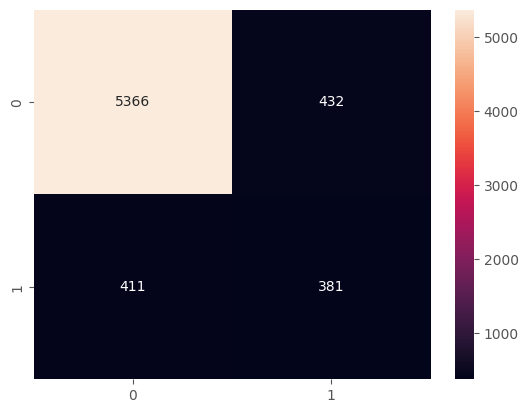

In [38]:
sns.heatmap(cm,annot=True, fmt='g')

In [39]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.47      0.48      0.47       792

    accuracy                           0.87      6590
   macro avg       0.70      0.70      0.70      6590
weighted avg       0.87      0.87      0.87      6590



In [40]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8720789074355083


Text(0, 0.5, 'True Positive Rate')

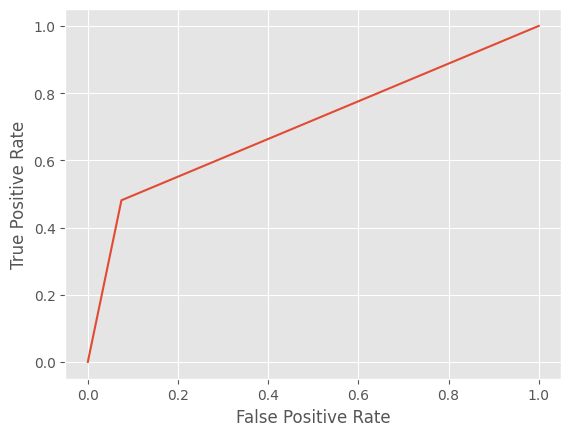

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [42]:
roc_nb = roc_auc_score(y_test, y_pred_nb)

In [43]:
print (f'AUC score: {roc_auc_score(y_test, y_pred_nb)}')

AUC score: 0.7032760774352702


# Random forest

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred_rf = rf.predict(x_test)

In [46]:
cm = confusion_matrix(y_test, y_pred_rf)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[5639  159]
 [ 486  306]]


<Axes: >

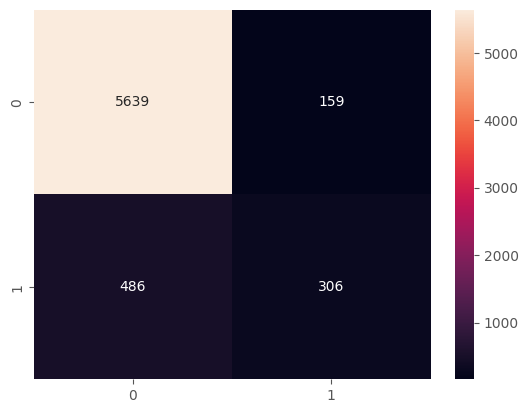

In [47]:
sns.heatmap(cm,annot=True, fmt='g')

In [48]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5798
           1       0.66      0.39      0.49       792

    accuracy                           0.90      6590
   macro avg       0.79      0.68      0.72      6590
weighted avg       0.89      0.90      0.89      6590



In [49]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.9021244309559939


Text(0, 0.5, 'True Positive Rate')

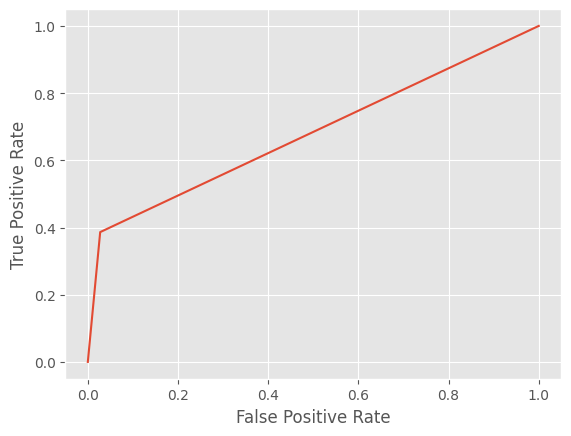

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [51]:
roc_rf = roc_auc_score(y_test, y_pred_rf)

In [52]:
print (f'AUC score: {roc_auc_score(y_test, y_pred_rf)}')

AUC score: 0.6794701934836463


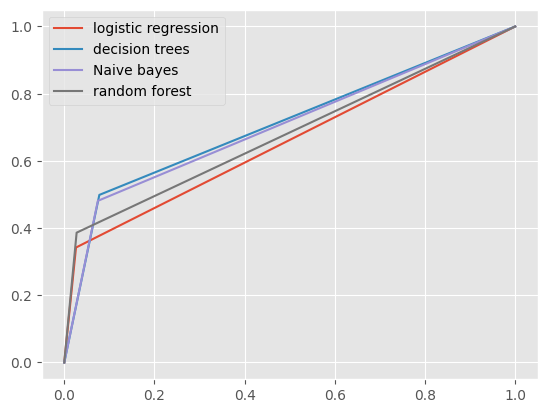

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr, label="logistic regression")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, label="decision trees")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr, tpr, label="Naive bayes")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, label="random forest")
plt.legend()

In [55]:
models_roc = [
            ('logistic regression', roc_log),
            ('decision trees', roc_dt),
            ('Naive bayes', roc_nb),
            ('random forest', roc_rf),
         ]

In [58]:
roc_data = pd.DataFrame(models_roc,columns=['Models','ROC_score'])
roc_data

,Models,ROC_score
0,logistic regression,0.658064
1,decision trees,0.710476
2,Naive bayes,0.703276
3,random forest,0.679470


(array([0, 1, 2, 3]),
 [Text(0, 0, 'logistic regression'),
  Text(1, 0, 'decision trees'),
  Text(2, 0, 'Naive bayes'),
  Text(3, 0, 'random forest')])

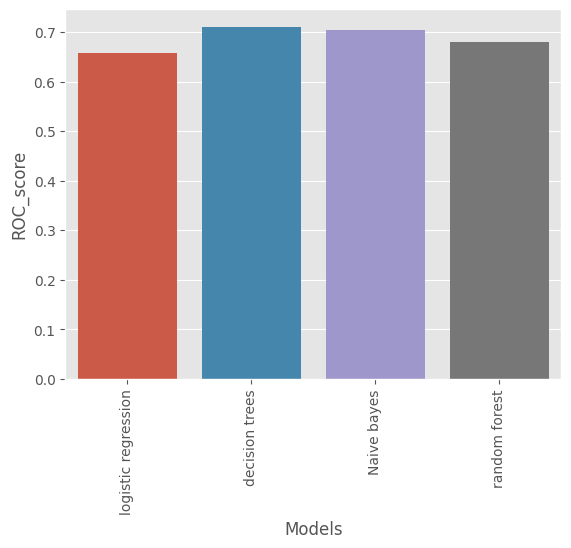

In [59]:
sns.barplot(data=roc_data, x="Models", y="ROC_score")
plt.xticks(rotation=90)